In [ ]:
### Github

# AVANT DE COMMENCER
 # git pull origin main - récupère les dernières modifs depuis GitHub

# APRES AVOIR FINI
 # git add . - ajoute tous les fichiers modifiés au prochain commit (aussi faire "git add mon_fichier.ipynb" pour n'ajouter qu'un fichier précis) 
 # git commit -m "Décris ici tes modifications"
 # git push origin main - pousse les commits sur la branche "main" du repo GitHub

# INSTALLATION VENV SUR NOUVEL ORDI
 # cd vers le bon dossier
 # python -m venv .venv
 # .venv\Scripts\activate 
 # pip install -r requirements.txt

In [9]:
import streamlit as st 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Getting the data for SPY (daily)
# Closing prices only
data = yf.download("SPY")['Close']
data.to_csv("spy_data.csv")
print(data.index)
print('\n\n\n\n')

C:\Users\cohen\AppData\Local\Temp\ipykernel_15444\437370412.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY")['Close']
[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2025-08-13', '2025-08-14', '2025-08-15', '2025-08-18',
               '2025-08-19', '2025-08-20', '2025-08-21', '2025-08-22',
               '2025-08-25', '2025-08-26', '2025-08-27', '2025-08-28',
               '2025-08-29', '2025-09-02', '2025-09-03', '2025-09-04',
               '2025-09-05', '2025-09-08', '2025-09-09', '2025-09-10',
               '2025-09-11', '2025-09-12'],
              dtype='datetime64[ns]', name='Date', freq=None)







In [3]:
spy = (pd.read_csv("spy_data.csv", index_col=0, parse_dates=True)['SPY'].pct_change() + 1).cumprod()
missing_values = data.isnull().sum() # # Check for missing values

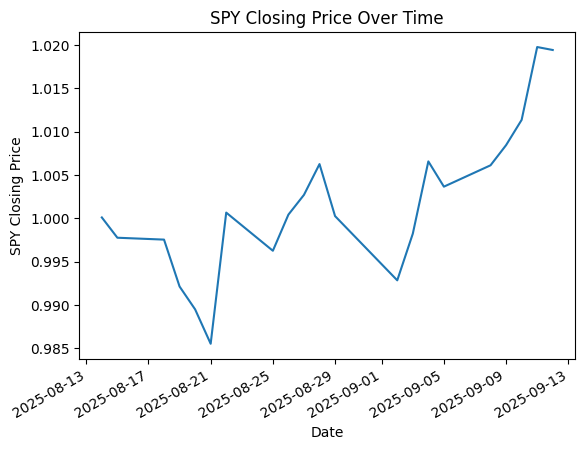

In [13]:
# Plot the data
spy.plot(label='SPY')
plt.ylabel("SPY Closing Price")
plt.title("SPY Closing Price Over Time")
plt.show()

C:\Users\cohen\AppData\Local\Temp\ipykernel_15444\472098939.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd = (yf.download("DX-Y.NYB", start=spy.index.min())['Close'].pct_change() + 1).cumprod()
[*********************100%***********************]  1 of 1 completed


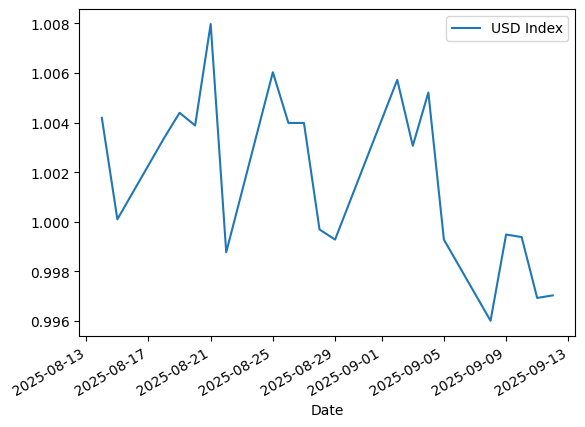

In [11]:
# forex using USD index
usd = (yf.download("DX-Y.NYB", start=spy.index.min())['Close'].pct_change() + 1).cumprod()
usd['DX-Y.NYB'].plot(label='USD Index')

plt.legend()
plt.show()